# <span style="color:#4B4278; text-decoration:underline;">Job Data Analysis</span>

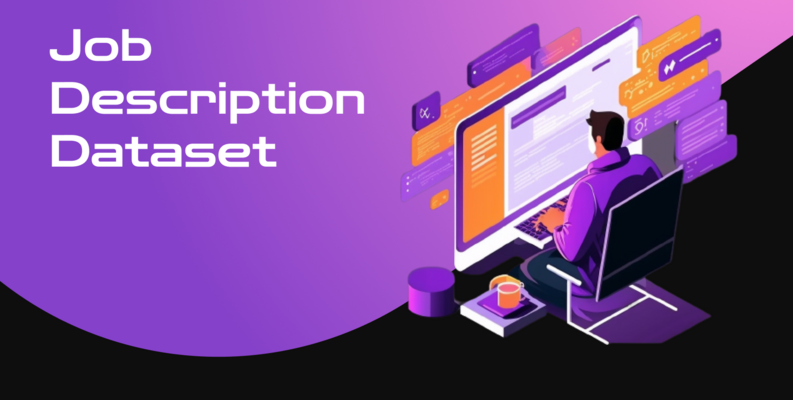

In [1]:
from IPython.display import Image

image_path = 'cover.png'

# Display the image
Image(filename=image_path)

<font color='#377380'>This curated dataset serves as a robust foundation for delving into the intricacies of job market dynamics, providing researchers and analysts with a rich source of synthetically crafted job postings. With a focus on supporting exploration in natural language processing (NLP) and machine learning applications, the dataset offers an opportunity to investigate evolving trends in diverse industries and job roles.</font>

<font color='#377380'>Researchers can leverage this dataset to unravel patterns, discern shifts in skill demands, and explore the nuanced language used in job descriptions. Its synthetic nature enables controlled experimentation, facilitating the development and refinement of models that can better interpret real-world job postings.</font>

<font color='#377380'>Designed with both educational and research objectives in mind, this dataset is a versatile tool for those seeking to enhance their understanding of the evolving employment landscape. It not only mirrors the diversity of job opportunities across sectors but also opens avenues for the exploration of emerging job roles and their corresponding skill requirements.</font>

In [2]:
%autosave 60

Autosaving every 60 seconds


## <font color='#4B4278'>Table of contents<font><a class='anchor' id='top'></a>    

<font color='#377380'> - [<font color='#377380'>Importing all the packages](#1)
    
<font color='#377380'> - [<font color='#377380'>Loading and Reading the csv file](#2)
        
<font color='#377380'> - [<font color='#377380'>Data cleaning](#3)
    
<font color='#377380'> - [<font color='#377380'>Correlation](#4)
    
<font color='#377380'> - [<font color='#377380'>Insights](#5)
    
<font color='#377380'> - [<font color='#377380'>Extra Insights](#6)

##  <font color='#4B4278'> Importing all the packages <a class="anchor" id="1"></a>

In [3]:
import pandas as pd
import numpy as np
import re
import ast

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## <font color='#4B4278'>Loading and Reading the csv file

In [4]:
df_data  = pd.read_csv('job_descriptions.csv', index_col=0)

<font color='#377380'> **Data source:** <a href="https://www.kaggle.com/datasets/ravindrasinghrana/job-description-dataset" style="color:#377380; text-decoration:bold;">https://www.kaggle.com/datasets/ravindrasinghrana/job-description-dataset</a>



In [5]:
pd.set_option('display.max_columns',None)

### <font color='#43A677'>Dataframe Description

<font color='#377380'> - **Job Id:** Unique id of the job for representation.
    
<font color='#377380'> - **Experience:** Experience required to apply for the job.
    
<font color='#377380'> - **Qualifications:** Required qualification for the job.
    
<font color='#377380'> - **Salary Range:** Salary Range for the post that can be expected from the company.
    
<font color='#377380'> - **Location:** Place of the job posted.
    
<font color='#377380'> - **Country:** Country of the job posted.
    
<font color='#377380'> - **Latitude:** Latitude of that region.
    
<font color='#377380'> - **Longitude:** Longitude of that region.
    
<font color='#377380'> - **Work Type:** Role of the job the company is offering.
    
<font color='#377380'> - **Company Size:** Total number of people working in that company.
    
<font color='#377380'> - **Job Posting Date:** Date on which the job was posted.
    
<font color='#377380'> - **Preference:** Gender-specific requirements of the company.
    
<font color='#377380'> - **Contact Person:** Name of the person whom to contact if interested in the job.
    
<font color='#377380'> - **Contact:** Contact number of the person to contact about the job.
    
<font color='#377380'> - **Job Title:** Title of the role offered in the company.
    
<font color='#377380'> - **Role:** Role of the offered job.
    
<font color='#377380'> - **Job Portal:** Website in which the job is posted.
    
<font color='#377380'> - **Job Description:** Description of the job role offered by the company.
    
<font color='#377380'> - **Benefits:** Benefits provided by the company to the employees.
    
<font color='#377380'> - **Skills:** Required skill set to apply for the job.
    
<font color='#377380'> - **Responsibilities:** Responsibilities or work that can be expected by the employee for the offered role.
    
<font color='#377380'> - **Company:** Name of the company.
    
<font color='#377380'> - **Company Profile:** All the other details about the company overview.

 

In [6]:
df_data.head()

,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
Job Id,,,,,,,,,,,,,,,,,,,,,,
1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,Female,Joy Lucero,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,Female,Julie Johnson,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


### <font color='#43A677'>Checking total length of the dataset

In [7]:
len(df_data)

1615940

### <font color='#43A677'>Creating a Copy of DataFrame

In [8]:
df = df_data.copy()

## <font color='#4B4278'> Data Cleaning

### <font color='#43A677'>Checking for nulls across all the columns of the dataset

In [9]:
df.isnull().sum()

Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64

#### <font color='#377380'> **Replace NaN values with a specific value**

In [10]:
df['Company Profile'].fillna('{}', inplace=True)

In [11]:
df.isnull().sum()

Experience          0
Qualifications      0
Salary Range        0
location            0
Country             0
latitude            0
longitude           0
Work Type           0
Company Size        0
Job Posting Date    0
Preference          0
Contact Person      0
Contact             0
Job Title           0
Role                0
Job Portal          0
Job Description     0
Benefits            0
skills              0
Responsibilities    0
Company             0
Company Profile     0
dtype: int64

### <font color='#43A677'>Filters DataFrame to Include Rows Where the 'Company Profile' Column is an Empty String

In [12]:
df[df['Company Profile'] == '{}']

,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
Job Id,,,,,,,,,,,,,,,,,,,,,,
2758708236284517,3 to 8 Years,B.Tech,$59K-$94K,George Town,Cayman Islands,19.3133,-81.2546,Part-Time,86718,2023-08-22,Male,Danielle Pruitt,7906673931,Database Administrator,Database Developer,SimplyHired,"A Database Developer designs, develops, and ma...","{'Employee Referral Programs, Financial Counse...",Database design and development SQL and databa...,"Design and implement database systems, tables,...",Peter Kiewit Sons,{}
1256176335840374,3 to 13 Years,B.Tech,$62K-$117K,Brussels,Belgium,50.5039,4.4699,Full-Time,65653,2022-02-12,Both,Aaron Santiago,001-620-731-2289x933,Architect,Sustainable Design Specialist,LinkedIn,Sustainable Design Specialists incorporate eco...,"{'Employee Referral Programs, Financial Counse...",Sustainable design principles Energy efficienc...,Focus on sustainable and eco-friendly architec...,Estée Lauder,{}
700667448142407,0 to 8 Years,BA,$61K-$101K,Quito,Ecuador,-1.8312,-78.1834,Contract,31086,2022-03-19,Male,Larry Humphrey,534-263-6605,Financial Controller,Accounting Controller,LinkedIn,Accounting Controllers manage an organizations...,"{'Employee Referral Programs, Financial Counse...",Accounting Financial reporting Financial audit...,"Manage accounting functions, including account...",Peter Kiewit Sons,{}
196368924080457,1 to 14 Years,PhD,$60K-$109K,Hanoi,Vietnam,14.0583,108.2772,Temporary,91610,2023-08-30,Male,Jason Ayala,8723680836,Financial Planner,Tax Planner,Stack Overflow Jobs,"Assist clients with tax planning, minimize tax...","{'Life and Disability Insurance, Stock Options...",Tax planning strategies Tax law knowledge Fina...,"Focus on tax planning and optimization, helpin...","Dunkin'Brands Group, Inc.",{}
669127484126386,2 to 8 Years,M.Com,$57K-$128K,Dakar,Senegal,14.4974,-14.4524,Intern,27214,2022-05-21,Both,Robin Horn,(299)540-5563x293,Event Planner,Corporate Event Planner,USAJOBS,Corporate Event Planners organize business-rel...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Corporate event planning Corporate branding Co...,"Organize corporate events, conferences, and se...",Estée Lauder,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697356543000511,4 to 11 Years,MCA,$55K-$114K,Bridgetown,Barbados,13.1939,-59.5432,Contract,67163,2023-02-23,Female,Lindsay Ortega,715-820-5818x8407,Electrical Designer,Lighting Designer,Jobs2Careers,Lighting Designers create lighting plans for a...,"{'Transportation Benefits, Professional Develo...",Lighting design Architectural lighting Lightin...,"Specialize in lighting design, creating lighti...",Peter Kiewit Sons,{}
2922844442400023,1 to 8 Years,M.Com,$64K-$127K,SÃ£o TomÃ©,Sao Tome and Principe,0.1864,6.6131,Temporary,34588,2022-11-30,Female,William Barnes,587-268-5135x7785,Registered Nurse,Clinical Nurse Specialist,CareerBuilder,A Clinical Nurse Specialist is an advanced pra...,"{'Tuition Reimbursement, Stock Options or Equi...","Clinical nursing specialization (e.g., critica...","Specialize in a specific area of patient care,...",Estée Lauder,{}
2652013558344708,0 to 13 Years,M.Tech,$64K-$102K,Riyadh,Saudi Arabia,23.8859,45.0792,Temporary,92551,2022-03-30,Both,Christopher Flores,832-332-9837,Registered Nurse,Clinical Nurse Specialist,Glassdoor,A Clinical Nurse Specialist is an advanced pra...,"{'Casual Dress Code, Social and Recreational A...","Clinical nursing specialization (e.g., critica...","Specialize in a specific area of patient care,...",Estée Lauder,{}


### <font color='#43A677'>Checking for duplicate values in the dataframe 

In [13]:
df['Benefits'] = df['Benefits'].astype(str)
df['Company Profile'] = df['Company Profile'].astype(str)
duplicate_rows = df[df.duplicated(subset=df.columns.difference(['Job Id']))]
duplicate_rows

,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
Job Id,,,,,,,,,,,,,,,,,,,,,,


### <font color='#43A677'>Data Cleaning on Experience column


#### <font color='#377380'> Adding two extra columns as Min experience and Max experiencs required for that particular job

<font color='#377380'> eg : 0 to 13 years: (min - 0)-(max - 13)

In [14]:
pattern = r'(\d+)\s*to\s*(\d+)\s*Years'
df[['Min_Experience', 'Max_Experience']] = df['Experience'].str.extract(pattern, expand=True)
df[['Min_Experience', 'Max_Experience']] = df[['Min_Experience', 'Max_Experience']].apply(pd.to_numeric)
index_years = df.columns.get_loc('Experience')
df.insert(index_years + 1, 'Min_Experience', df.pop('Min_Experience'))
df.insert(index_years + 2, 'Max_Experience', df.pop('Max_Experience'))
df.drop(['Experience'], axis=1, inplace=True)

In [15]:
df.head(5)

,Min_Experience,Max_Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
Job Id,,,,,,,,,,,,,,,,,,,,,,,
1089843540111562,5,15,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
398454096642776,2,12,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
481640072963533,0,12,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
688192671473044,4,11,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,Female,Joy Lucero,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
117057806156508,1,12,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,Female,Julie Johnson,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


### <font color='#43A677'> Analysis for data cleaning on Qualifications column

In [16]:
qualifications_counts = df['Qualifications'].value_counts()
qualifications_counts

BBA       162148
BA        162138
BCA       161733
M.Tech    161719
PhD       161662
MBA       161537
B.Tech    161443
M.Com     161396
B.Com     161298
MCA       160866
Name: Qualifications, dtype: int64

####  <font color='#377380'>Result: There are no multiple entries referring to the same category.

### <font color='#43A677'> Data Cleaning on Salary Range column

#### <font color='#377380'> Adding two extra columns as Min salary and Max salary paid for that particular job in thousands

<font color='#377380'> eg : 65K to 103K: (minSalary - 65) - (maxSalary - 103)

In [17]:
pattern = r'\$(\d+)K-\$(\d+)K'
df[['Min_Salary', 'Max_Salary']] = df['Salary Range'].str.extract(pattern)
df['Min_Salary'] = pd.to_numeric(df['Min_Salary'])
df['Max_Salary'] = pd.to_numeric(df['Max_Salary'])
index_years = df.columns.get_loc('Salary Range')
df.insert(index_years + 1, 'Min_Salary', df.pop('Min_Salary'))
df.insert(index_years + 2, 'Max_Salary', df.pop('Max_Salary'))
df.drop(['Salary Range'], axis=1, inplace=True)

In [18]:
df.head(3)

,Min_Experience,Max_Experience,Qualifications,Min_Salary,Max_Salary,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
Job Id,,,,,,,,,,,,,,,,,,,,,,,,
1089843540111562,5,15,M.Tech,59,99,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
398454096642776,2,12,BCA,56,116,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
481640072963533,0,12,PhD,61,104,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."


###  <font color='#43A677'>Analysis for Data Cleaning on Work Type column

In [19]:
work_type_counts = df['Work Type'].value_counts()
work_type_counts

Part-Time    324044
Temporary    323439
Contract     323131
Intern       323090
Full-Time    322236
Name: Work Type, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7aa3969c60>,
 [Text(-0.6480438647638188, 0.888841464684211, ''),
  Text(-1.044857304520279, -0.34390872799424127, ''),
  Text(0.004612883174001003, -1.0999903278251237, ''),
  Text(1.047477279741295, -0.33584423238426636, ''),
  Text(0.6449155222271784, 0.8911138923787721, '')],
 [Text(-0.35347847168935564, 0.4848226171004787, '20.1%'),
  Text(-0.5699221661019703, -0.18758657890594976, '20.0%'),
  Text(0.0025161180949096374, -0.5999947242682493, '20.0%'),
  Text(0.5713512434952517, -0.18318776311869073, '20.0%'),
  Text(0.3517721030330064, 0.48606212311569386, '19.9%')])

Text(0.5, 1.0, 'Distribution of Work Types for experience level')

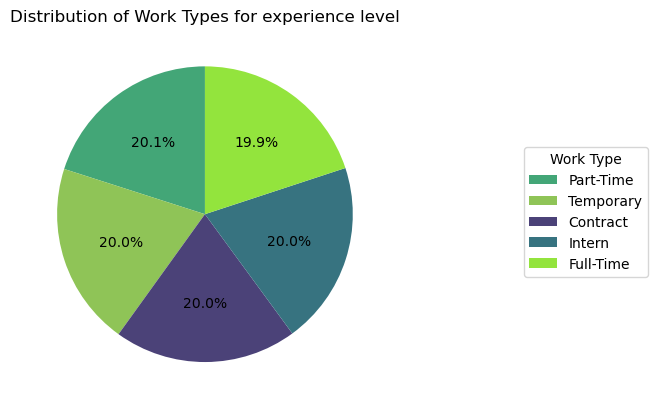

In [69]:
import matplotlib.pyplot as plt

# Calculate the counts of each work type
work_type_counts = df['Work Type'].value_counts()

# Specify custom colors
custom_colors = ['#43A677', '#8FC457', '#4B4278', '#377380', '#93E43D']

# Plotting the pie chart with custom colors
plt.pie(work_type_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Distribution of Work Types for experience level')

# Adding a legend inside the pie chart
plt.legend(work_type_counts.index, title='Work Type', bbox_to_anchor=(1, 0.5), loc="center left", bbox_transform=plt.gcf().transFigure)

plt.show()

<font color='#377380'> The analysis shown in the pie chart brings out the following insights:
Part-time work is the most common work type. It accounts for 20.1% of all work types.
Temporary and contract work are also common, accounting for 19.9% and 20.0% of all work types, respectively.
Internship and full-time work are less common, accounting for 20.0% and 20.0% of all work types, respectively.
This suggests that many workers in the workforce are either working part-time, temporarily, or on a contract basis. 
The analysis also shows that there is a relatively even distribution of work types across experience levels. This suggests that there are opportunities for workers of all experience levels to find work.

#### <font color='#377380'>Result: There are no multiple entries referring to the same category such as FT or Full Time and Full Time as seperate values in the column

### <font color='#43A677'> Analysis for Data Cleaning on Job Posting Date column

In [21]:
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'], errors='coerce')
all_dates_in_correct_format = not df['Job Posting Date'].isna().any()
print(f"All dates are in the correct format: {all_dates_in_correct_format}")

All dates are in the correct format: True


#### <font color='#377380'> Result : As all the dates are entered in correct order, no formatting is required.

### <font color='#43A677'> Data Cleaning on Contact column

<font color='#377380'>Checking for the pattern of the number and removing the wrong numbers entered and replacing it with value no contact

In [22]:
pd.set_option('display.max_columns',None)
df['Cleaned_Contact'] = df['Contact'].str.replace('.', '-').str.extract(r'(\d[\d\-\(\)]+)\D*', expand=False)
df['Cleaned_Contact'].fillna('no contact', inplace=True)
index_years = df.columns.get_loc('Contact')
df.insert(index_years + 1, 'Cleaned_Contact', df.pop('Cleaned_Contact'))
#df.drop(['Contact'], axis=1, inplace=True)

/var/folders/xl/w33mqwts3sq9rj51nyxfy13m0000gn/T/ipykernel_55303/498427290.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Cleaned_Contact'] = df['Contact'].str.replace('.', '-').str.extract(r'(\d[\d\-\(\)]+)\D*', expand=False)


In [23]:
df.head(3)

,Min_Experience,Max_Experience,Qualifications,Min_Salary,Max_Salary,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Cleaned_Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Experience
Job Id,,,,,,,,,,,,,,,,,,,,,,,,,,
1089843540111562,5,15,M.Tech,59,99,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,001-381-930-7517x737,001-381-930-7517,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",10.0
398454096642776,2,12,BCA,56,116,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,461-509-4216,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",7.0
481640072963533,0,12,PhD,61,104,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,9687619505,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",6.0


In [24]:
pd.set_option('display.max_columns',None)


# Function to clean the contact numbers
def clean_contact(contact):
    # Remove non-digit characters
    digits = ''.join(filter(str.isdigit, contact))
    
    # Handleling specific cases
    if digits.startswith('001'):
        digits = digits[3:]
    elif digits.startswith('00'):
        digits = digits[2:]
    elif digits.startswith('0'):
        digits = digits[1:]
    
    # Extractracting only the digits before the extension
    cleaned_digits = digits.split('x')[0][:10]
    
    # Formatting the cleaned digits with '-' after every 3 digits from the start and the last 4 digits
    cleaned_contact = f"+1-{cleaned_digits[:3]}-{cleaned_digits[3:6]}-{cleaned_digits[6:]}"

    return cleaned_contact if cleaned_contact else 'no contact'

# Applying the cleaning function to the 'Contact' column
df['Cleaned_Contact'] = df['Contact'].apply(clean_contact)

### <font color='#43A677'>Data Cleaning on Benifits column

<font color='#377380'>Taking the Health Insurance and  Retirement Plans as seperate columns and getting the companies that provided these benifits with value 1 in the column.

In [25]:
df_expanded = df['Benefits'].str.split(',').explode()
df_expanded_cleaned = df_expanded.str.replace(r'[{}"\'()]', '').str.strip()
benefit_counts = df_expanded_cleaned.value_counts()
print("Count of each benefit:")
benefit_counts

/var/folders/xl/w33mqwts3sq9rj51nyxfy13m0000gn/T/ipykernel_55303/3484795579.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_expanded_cleaned = df_expanded.str.replace(r'[{}"\'()]', '').str.strip()


Count of each benefit:


Bonuses and Incentive Programs        404287
Flexible Work Arrangements            324021
Professional Development              323743
Retirement Plans                      323674
Childcare Assistance                  323605
Employee Assistance Programs EAP      323573
Employee Discounts                    323396
Transportation Benefits               323295
Profit-Sharing                        323295
Wellness Programs                     323258
Relocation Assistance                 323216
Tuition Reimbursement                 323157
Parental Leave                        323157
Health Insurance                      323092
Employee Referral Programs            323079
Casual Dress Code                     323079
Health and Wellness Facilities        323079
Legal Assistance                      322869
Flexible Spending Accounts FSAs       322828
Financial Counseling                  322828
Stock Options or Equity Grants        322676
Life and Disability Insurance         322538
Social and

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Count of Each Benefit')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Benefits')

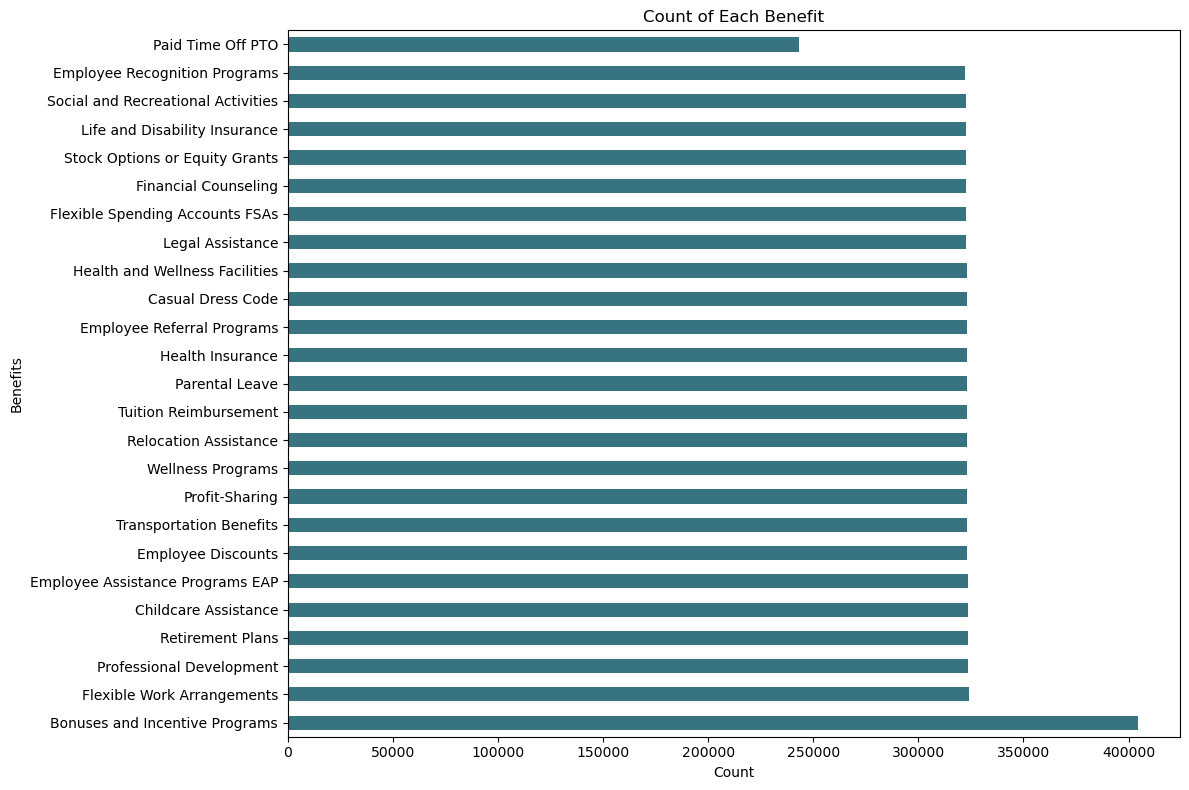

In [70]:
# Plotting
plt.figure(figsize=(12, 8))
benefit_counts.plot(kind='barh', color='#377380')
plt.title('Count of Each Benefit')
plt.xlabel('Count')
plt.ylabel('Benefits')
plt.tight_layout()

# Show the plot
plt.show()


In [27]:
df['Benefits'] = df['Benefits'].str.replace('Wellness Programs', 'Wellness Facilities')
df['Benefits'] = df['Benefits'].str.replace('Health and Wellness Facilities', 'Wellness Facilities')

df['Health Insurance'] = df['Benefits'].apply(lambda x: 1 if 'Health Insurance' in x else 0)
df['Retirement Plans'] = df['Benefits'].apply(lambda x: 1 if 'Retirement Plans' in x else 0)
df['Paid Time Off (PTO)'] = df['Benefits'].apply(lambda x: 1 if 'Paid Time Off (PTO)' in x else 0)
df['Wellness Facilities'] = df['Benefits'].apply(lambda x: 1 if 'Wellness Facilities' in x else 0)

index_benefits = df.columns.get_loc('Benefits')

df.insert(index_benefits + 1, 'Health Insurance', df.pop('Health Insurance'))
df.insert(index_benefits + 2, 'Retirement Plans', df.pop('Retirement Plans'))
df.insert(index_benefits + 3, 'Paid Time Off (PTO)', df.pop('Paid Time Off (PTO)'))
df.insert(index_benefits + 4, 'Wellness Facilities', df.pop('Wellness Facilities'))


In [28]:
df.head(3)

,Min_Experience,Max_Experience,Qualifications,Min_Salary,Max_Salary,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Cleaned_Contact,Job Title,Role,Job Portal,Job Description,Benefits,Health Insurance,Retirement Plans,Paid Time Off (PTO),Wellness Facilities,skills,Responsibilities,Company,Company Profile,Experience
Job Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1089843540111562,5,15,M.Tech,59,99,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,001-381-930-7517x737,+1-381-930-7517,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...",0,0,0,0,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",10.0
398454096642776,2,12,BCA,56,116,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,461-509-4216,+1-461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...",1,1,1,0,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",7.0
481640072963533,0,12,PhD,61,104,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,9687619505,+1-968-761-9505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",0,1,0,1,Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",6.0


### <font color='#43A677'>Data Cleaning on Company Profile Column

<font color='#377380'>The Company Profie columns consists of values in the form of a dictionary with upto 7 set of keys and values.
So making eack key into a seperate column in the data frame with the specified values.
And added a empty dictionary as value if the original value of the field is Unknown.

In [29]:
import json
import ast 

df['Company Profile'] = df['Company Profile'].str.replace(r'"CEO":"Earl C\. "Duke"', '"CEO":"Earl C. Duke')

def clean_and_structure(profile):
    try:
        return json.loads(profile)
    except (json.JSONDecodeError, TypeError):
        return None
    
df['Company Profile'] = df['Company Profile'].apply(clean_and_structure)
df['Company Profile'].fillna({}, inplace=True)
df_normalized = pd.json_normalize(df['Company Profile'])
df[['Sector','Industry','City','State','Zip','Website','Ticker','CEO']]= df_normalized[['Sector','Industry','City','State','Zip','Website','Ticker','CEO']].values
df.drop(['Company Profile'], axis=1, inplace=True)

/var/folders/xl/w33mqwts3sq9rj51nyxfy13m0000gn/T/ipykernel_55303/2280943562.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Company Profile'] = df['Company Profile'].str.replace(r'"CEO":"Earl C\. "Duke"', '"CEO":"Earl C. Duke')


In [30]:
df

,Min_Experience,Max_Experience,Qualifications,Min_Salary,Max_Salary,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Cleaned_Contact,Job Title,Role,Job Portal,Job Description,Benefits,Health Insurance,Retirement Plans,Paid Time Off (PTO),Wellness Facilities,skills,Responsibilities,Company,Experience,Sector,Industry,City,State,Zip,Website,Ticker,CEO
Job Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1089843540111562,5,15,M.Tech,59,99,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,001-381-930-7517x737,+1-381-930-7517,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...",0,0,0,0,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,10.0,Diversified,Diversified Financials,Sunny Isles Beach,Florida,33160,www.ielp.com,IEP,David Willetts
398454096642776,2,12,BCA,56,116,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,461-509-4216,+1-461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...",1,1,1,0,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,7.0,Financial Services,Commercial Banks,Pittsburgh,Pennsylvania,15222,www.pnc.com,PNC,William S. Demchak
481640072963533,0,12,PhD,61,104,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,9687619505,+1-968-761-9505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",0,1,0,1,Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,6.0,Insurance,Insurance: Property and Casualty (Stock),San Antonio,Texas,78288,www.usaa.com,,Wayne Peacock
688192671473044,4,11,PhD,65,91,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,Female,Joy Lucero,+1-820-643-5431x47576,+1-182-064-3543,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",0,0,0,0,Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,7.5,Energy,"Mining, Crude-Oil Production",New York,New York,10036,www.hess.com,HES,John B. Hess
117057806156508,1,12,MBA,64,87,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,Female,Julie Johnson,343.975.4702x9340,+1-343-975-4702,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",0,0,0,0,Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,6.5,Energy,Energy - Oil & Gas Exploration & Production,Edinburgh,Scotland,EH2 4NH,https://www.cairnenergy.com/,CNE,Simon Thomson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134563577088850,0,12,B.Tech,64,114,"Malabo (de jure),",Equatorial Guinea,1.6508,10.2679,Full-Time,18281,2022-05-19,Both,Shawn Cortez,950-451-5843,+1-950-451-5843,Mechanical Engineer,Mechanical Design Engineer,ZipRecruiter,Mechanical Design Engineers create and develop...,"{'Employee Assistance Programs (EAP), Tuition ...",0,0,0,0,"Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",The Hershey Company,6.0,Food and Beverage/Confectionery,Food Manufacturing,Hershey,PA,17033,https://www.thehersheycompany.com/,HSY,Michele Buck
618604818190827,2,14,M.Tech,62,130,Warsaw,Poland,51.9194,19.1451,Intern,63621,2023-03-14,Male,Steven Diaz,676.38

#### <font color='#377380'>Returns the Index Values of Rows with Null Values in the 'Company Profile' Column in DataFrame.

In [31]:
df_data[df_data['Company Profile'].isnull()].index

Int64Index([2758708236284517, 1256176335840374,  700667448142407,
             196368924080457,  669127484126386, 1792066405461970,
            1469449156299398,  439873195272480,  425387492421268,
            2717210056314547,
            ...
            2256150092137915,  821837639534024, 2722761997893109,
            1043958588676768, 2550530271622961, 2697356543000511,
            2922844442400023, 2652013558344708, 1989513875071329,
             854750947408034],
           dtype='int64', name='Job Id', length=5478)

#### <font color='#377380'>Returns the Index Values of Rows with Null Values in the 'Sector' Column in DataFrame .

In [32]:
df[df['Sector'].isnull()].index

Int64Index([2758708236284517, 1256176335840374,  700667448142407,
             196368924080457,  669127484126386, 1792066405461970,
            1469449156299398,  439873195272480,  425387492421268,
            2717210056314547,
            ...
            2256150092137915,  821837639534024, 2722761997893109,
            1043958588676768, 2550530271622961, 2697356543000511,
            2922844442400023, 2652013558344708, 1989513875071329,
             854750947408034],
           dtype='int64', name='Job Id', length=5478)

In [33]:
df_data.loc[1206752510101994, 'Company Profile']

'{"Sector":"Construction","Industry":"Engineering & Construction","City":"Houston","State":"Texas","Zip":"77008","Website":"www.quantaservices.com","Ticker":"PWR","CEO":"Earl C. "Duke" Austin"}'

In [34]:
df.isnull().sum()

Min_Experience            0
Max_Experience            0
Qualifications            0
Min_Salary                0
Max_Salary                0
location                  0
Country                   0
latitude                  0
longitude                 0
Work Type                 0
Company Size              0
Job Posting Date          0
Preference                0
Contact Person            0
Contact                   0
Cleaned_Contact           0
Job Title                 0
Role                      0
Job Portal                0
Job Description           0
Benefits                  0
Health Insurance          0
Retirement Plans          0
Paid Time Off (PTO)       0
Wellness Facilities       0
skills                    0
Responsibilities          0
Company                   0
Experience                0
Sector                 5478
Industry               5478
City                   5478
State                  5478
Zip                    5478
Website                5478
Ticker              

In [35]:
df[df.CEO == 'Brendan Horgan']

,Min_Experience,Max_Experience,Qualifications,Min_Salary,Max_Salary,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Cleaned_Contact,Job Title,Role,Job Portal,Job Description,Benefits,Health Insurance,Retirement Plans,Paid Time Off (PTO),Wellness Facilities,skills,Responsibilities,Company,Experience,Sector,Industry,City,State,Zip,Website,Ticker,CEO
Job Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2894688809840,2,10,M.Tech,61,116,Juba,South Sudan,6.8770,31.3070,Contract,105454,2022-01-08,Male,Robert Johnson,(681)862-9080x60450,+1-681-862-9080,Environmental Engineer,Sustainability Specialist,Indeed,A Sustainability Specialist promotes sustainab...,"{'Life and Disability Insurance, Stock Options...",1,0,0,0,Sustainability practices Environmental managem...,Promote sustainability practices within organi...,Ashtead Group,6.0,Equipment Rental,Equipment Rental,London,N/A,N/A,www.ashtead-group.com,AHT.L,Brendan Horgan
601717006540240,1,15,BBA,63,128,Panama City,Panama,8.5379,-80.7821,Contract,92283,2023-09-03,Both,Heather Washington,(570)807-5812,+1-570-807-5812,Environmental Consultant,Sustainability Consultant,SimplyHired,Sustainability Consultants advise organization...,"{'Flexible Spending Accounts (FSAs), Relocatio...",0,0,0,0,Sustainability consulting Sustainability asses...,Focus on sustainable practices and initiatives...,Ashtead Group,8.0,Equipment Rental,Equipment Rental,London,N/A,N/A,www.ashtead-group.com,AHT.L,Brendan Horgan
1496816125209184,2,10,BA,59,129,Abu Dhabi,UAE,23.4241,53.8478,Full-Time,51923,2021-09-24,Both,Carolyn Wilson,(893)268-4636,+1-893-268-4636,Executive Assistant,Personal Assistant,Snagajob,A Personal Assistant provides administrative s...,"{'Employee Referral Programs, Financial Counse...",0,0,0,1,Organizational and time management skills Cale...,Provide high-level administrative support to e...,Ashtead Group,6.0,Equipment Rental,Equipment Rental,London,N/A,N/A,www.ashtead-group.com,AHT.L,Brendan Horgan
717904056556686,5,9,PhD,62,126,Male,Maldives,3.2028,73.2207,Contract,71888,2023-05-03,Female,Jeffrey Williams,(453)773-1262,+1-453-773-1262,Social Media Manager,Community Manager,SimplyHired,Community Managers build and engage online com...,"{'Casual Dress Code, Social and Recreational A...",0,0,0,1,Community engagement and moderation Online com...,Build and manage online communities and social...,Ashtead Group,7.0,Equipment Rental,Equipment Rental,London,N/A,N/A,www.ashtead-group.com,AHT.L,Brendan Horgan
1703818290323507,4,11,M.Com,61,93,Gitega,Burundi,-3.3731,29.9189,Intern,84822,2021-10-27,Male,Susan Cook,624-274-0917x323,+1-624-274-0917,Personal Assistant,Personal Secretary,Indeed,Personal Secretaries provide administrative su...,"{'Tuition Reimbursement, Stock Options or Equi...",0,0,0,1,Administrative support Calendar management Com...,"Act as a personal secretary, managing personal...",Ashtead Group,7.5,Equipment Rental,Equipment Rental,London,N/A,N/A,www.ashtead-group.com,AHT.L,Brendan Horgan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538998449825866,5,13,B.Tech,59,126,San Marino,San Marino,43.9424,12.4578,Intern,122954,2022-11-13,Male,Pedro Freeman,697-236-9099x88717,+1-697-236-9099,Software Tester,Quality Assurance Analyst,SimplyHired,A Quality Assurance Analyst tests software and...,"{'Transportation Benefits, Professional Develo...",0,0,0,0,Quality assurance processes Testing methodolog...,Test software applications and systems to iden...,Ashtead Group,9.0,Equipment Rental,Equipment Rental,London,N/A,N/A,www.ashtead-group.com,AHT.L,Brendan Horgan
468786607971848,2,14,M.Tech,63,82,Port of Spain,Trinidad and Tobago,10.6918,-61.2225,Intern,38662,2022-03-08,Male,John Chavez,881.582.2208,+1-881-582-2208,Supply Chain Manager,Demand Planner,USAJOBS,A Demand Planner analyzes historical sales dat...,"{'Employee Assistance Programs (EAP), 

In [36]:
# Function to replace NaN values based on matching last column values

'''
def replace_na_with_matching_row(df):
    for i in range(len(df)):
        current_row = df.iloc[i]
        matching_rows = df[(df.iloc[:, -1] == current_row.iloc[-1]) & (df.index != i)]
        matching_rows = matching_rows.dropna(subset=current_row.index)  # Exclude NaN values
        if not matching_rows.empty:
            matching_row = matching_rows.iloc[0]
            df.iloc[i] = df.iloc[i].combine_first(matching_row)
    return df

# Apply the function to the DataFrame
df = replace_na_with_matching_row(df)

'''

'\ndef replace_na_with_matching_row(df):\n    for i in range(len(df)):\n        current_row = df.iloc[i]\n        matching_rows = df[(df.iloc[:, -1] == current_row.iloc[-1]) & (df.index != i)]\n        matching_rows = matching_rows.dropna(subset=current_row.index)  # Exclude NaN values\n        if not matching_rows.empty:\n            matching_row = matching_rows.iloc[0]\n            df.iloc[i] = df.iloc[i].combine_first(matching_row)\n    return df\n\n# Apply the function to the DataFrame\ndf = replace_na_with_matching_row(df)\n\n'

In [37]:
'''
df
'''

'\ndf\n'

In [38]:
df.isnull().sum()

Min_Experience            0
Max_Experience            0
Qualifications            0
Min_Salary                0
Max_Salary                0
location                  0
Country                   0
latitude                  0
longitude                 0
Work Type                 0
Company Size              0
Job Posting Date          0
Preference                0
Contact Person            0
Contact                   0
Cleaned_Contact           0
Job Title                 0
Role                      0
Job Portal                0
Job Description           0
Benefits                  0
Health Insurance          0
Retirement Plans          0
Paid Time Off (PTO)       0
Wellness Facilities       0
skills                    0
Responsibilities          0
Company                   0
Experience                0
Sector                 5478
Industry               5478
City                   5478
State                  5478
Zip                    5478
Website                5478
Ticker              

In [39]:
df.fillna('Unknown', inplace=True)

In [40]:
df.isnull().sum()

Min_Experience         0
Max_Experience         0
Qualifications         0
Min_Salary             0
Max_Salary             0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Cleaned_Contact        0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
Health Insurance       0
Retirement Plans       0
Paid Time Off (PTO)    0
Wellness Facilities    0
skills                 0
Responsibilities       0
Company                0
Experience             0
Sector                 0
Industry               0
City                   0
State                  0
Zip                    0
Website                0
Ticker                 0
CEO                    0
dtype: int64

## <font color='#4B4278'>Correlation

In [41]:
df_corr = df.copy()

In [42]:
df_corr

,Min_Experience,Max_Experience,Qualifications,Min_Salary,Max_Salary,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Cleaned_Contact,Job Title,Role,Job Portal,Job Description,Benefits,Health Insurance,Retirement Plans,Paid Time Off (PTO),Wellness Facilities,skills,Responsibilities,Company,Experience,Sector,Industry,City,State,Zip,Website,Ticker,CEO
Job Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1089843540111562,5,15,M.Tech,59,99,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,001-381-930-7517x737,+1-381-930-7517,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...",0,0,0,0,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,10.0,Diversified,Diversified Financials,Sunny Isles Beach,Florida,33160,www.ielp.com,IEP,David Willetts
398454096642776,2,12,BCA,56,116,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,461-509-4216,+1-461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...",1,1,1,0,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,7.0,Financial Services,Commercial Banks,Pittsburgh,Pennsylvania,15222,www.pnc.com,PNC,William S. Demchak
481640072963533,0,12,PhD,61,104,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,9687619505,+1-968-761-9505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",0,1,0,1,Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,6.0,Insurance,Insurance: Property and Casualty (Stock),San Antonio,Texas,78288,www.usaa.com,,Wayne Peacock
688192671473044,4,11,PhD,65,91,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,Female,Joy Lucero,+1-820-643-5431x47576,+1-182-064-3543,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",0,0,0,0,Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,7.5,Energy,"Mining, Crude-Oil Production",New York,New York,10036,www.hess.com,HES,John B. Hess
117057806156508,1,12,MBA,64,87,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,Female,Julie Johnson,343.975.4702x9340,+1-343-975-4702,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",0,0,0,0,Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,6.5,Energy,Energy - Oil & Gas Exploration & Production,Edinburgh,Scotland,EH2 4NH,https://www.cairnenergy.com/,CNE,Simon Thomson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134563577088850,0,12,B.Tech,64,114,"Malabo (de jure),",Equatorial Guinea,1.6508,10.2679,Full-Time,18281,2022-05-19,Both,Shawn Cortez,950-451-5843,+1-950-451-5843,Mechanical Engineer,Mechanical Design Engineer,ZipRecruiter,Mechanical Design Engineers create and develop...,"{'Employee Assistance Programs (EAP), Tuition ...",0,0,0,0,"Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",The Hershey Company,6.0,Food and Beverage/Confectionery,Food Manufacturing,Hershey,PA,17033,https://www.thehersheycompany.com/,HSY,Michele Buck
618604818190827,2,14,M.Tech,62,130,Warsaw,Poland,51.9194,19.1451,Intern,63621,2023-03-14,Male,Steven Diaz,676.38

In [43]:
 for column in df_corr.columns:
        df_corr.loc[:, column] = df[column].astype('category').cat.codes
       
cor = df_corr.corr()
cor

/var/folders/xl/w33mqwts3sq9rj51nyxfy13m0000gn/T/ipykernel_55303/3260327834.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_corr.loc[:, column] = df[column].astype('category').cat.codes
/var/folders/xl/w33mqwts3sq9rj51nyxfy13m0000gn/T/ipykernel_55303/3260327834.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_corr.loc[:, column] = df[column].astype('category').cat.codes
/var/folders/xl/w33mqwts3sq9rj51nyxfy13m0000gn/T/ipykernel_55303/3260327834.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attemp

/var/folders/xl/w33mqwts3sq9rj51nyxfy13m0000gn/T/ipykernel_55303/3260327834.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_corr.loc[:, column] = df[column].astype('category').cat.codes
/var/folders/xl/w33mqwts3sq9rj51nyxfy13m0000gn/T/ipykernel_55303/3260327834.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_corr.loc[:, column] = df[column].astype('category').cat.codes
/var/folders/xl/w33mqwts3sq9rj51nyxfy13m0000gn/T/ipykernel_55303/3260327834.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attemp

,Min_Experience,Max_Experience,Qualifications,Min_Salary,Max_Salary,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Cleaned_Contact,Job Title,Role,Job Portal,Job Description,Benefits,Health Insurance,Retirement Plans,Paid Time Off (PTO),Wellness Facilities,skills,Responsibilities,Company,Experience,Sector,Industry,City,State,Zip,Website,Ticker,CEO
Min_Experience,1.000000,-0.000970,-0.000321,0.001025,0.001677,0.000724,-0.000041,-0.000547,-0.000031,-0.000610,0.000333,0.000495,-0.000899,-0.001108,-0.001228,-0.000293,0.000350,-0.001415,-0.000093,-0.000151,0.000414,0.000260,0.000316,0.000184,0.000015,0.000234,0.000575,-0.000621,0.597002,0.000150,-0.001412,-0.000467,0.000581,-0.000842,-0.001370,-0.000828,-0.000423
Max_Experience,-0.000970,1.000000,-0.001078,-0.000789,0.000304,0.000368,-0.000517,0.001067,-0.001322,0.000937,-0.000974,0.000334,0.000077,-0.001209,0.000085,-0.000300,0.000527,0.000736,0.000586,0.000101,-0.000762,-0.000412,-0.000654,0.000608,0.000166,0.000452,-0.000719,0.000721,0.801660,-0.000123,-0.001737,0.000124,-0.000251,-0.000027,-0.000228,0.000457,0.001319
Qualifications,-0.000321,-0.001078,1.000000,-0.000117,0.000792,0.000164,0.000004,-0.000484,0.000060,-0.000382,-0.000473,0.000633,-0.000613,-0.000664,-0.000406,0.000314,-0.000152,0.000166,-0.000694,0.000516,-0.000730,-0.000893,-0.000278,0.000738,-0.000770,0.000109,0.000081,-0.000290,-0.001057,0.000227,0.000710,-0.000033,0.000409,0.000472,-0.000381,-0.000358,-0.000348
Min_Salary,0.001025,-0.000789,-0.000117,1.000000,0.000995,0.001193,-0.001766,-0.000212,0.000356,-0.000187,-0.000441,-0.000293,-0.000148,0.001215,0.000324,-0.000315,0.000389,0.000829,0.000569,0.000861,0.000498,0.000189,-0.000081,-0.000015,0.000111,0.001883,0.001188,0.001141,-0.000020,0.000526,0.000035,0.000786,-0.000397,-0.000075,0.000059,0.001180,0.000542
Max_Salary,0.001677,0.000304,0.000792,0.000995,1.000000,-0.000277,-0.001053,0.000127,-0.000510,0.000957,0.000222,0.000175,-0.000700,0.000718,0.000388,-0.000447,-0.000212,0.001009,-0.000133,0.001072,0.000825,-0.001401,-0.001331,-0.000929,0.000836,0.000803,0.000067,-0.000103,0.001246,-0.001063,-0.001785,0.000269,0.000364,-0.000770,-0.000262,0.000292,0.000102
location,0.000724,0.000368,0.000164,0.001193,-0.000277,1.000000,-0.059513,0.082926,-0.025349,0.000394,-0.000401,-0.000054,-0.002334,-0.000119,-0.000193,-0.000488,0.000929,0.000219,-0.000172,0.001005,0.000465,-0.000188,0.000031,-0.001354,0.000536,-0.000074,0.000538,-0.001195,0.000729,-0.000891,-0.000782,-0.000129,0.000616,-0.000539,-0.001677,-0.001025,-0.000053
Country,-0.000041,-0.000517,0.000004,-0.001766,-0.001053,-0.059513,1.000000,-0.064100,0.164630,0.000715,0.000993,-0.000845,0.000891,0.001004,0.000949,0.000864,0.001385,-0.001602,0.001559,0.000492,0.000182,-0.000060,-0.000526,0.000193,-0.000691,-0.000228,0.001504,-0.000373,-0.000439,0.000844,0.000821,-0.000047,0.000252,0.000255,0.000364,0.000065,-0.000666
latitude,-0.000547,0.001067,-0.000484,-0.000212,0.000127,0.082926,-0.064100,1.000000,-0.003373,0.001709,0.000068,0.000006,-0.000699,0.001759,0.000111,0.001147,-0.000174,0.000487,0.000443,-0.000370,0.001907,0.000192,0.000772,0.000437,0.000466,0.000521,-0.000193,0.000773,0.000529,0.000173,0.000068,-0.001128,0.000598,0.002320,0.000364,0.000562,0.000647
longitude,-0.000031,-0.001322,0.000060,0.000356,-0.000510,-0.025349,0.164630,-0.003373,1.000000,0.000180,-0.000889,0.000666,-0.000517,0.000186,0.000439,0.000853,0.000479,-0.000442,-0.000571,-0.000352,0.000854,0.000425,0.001032,0.000505,-0.000796,-0.000850,-0.000861,-0.001423,-0.001080,-0.000637,-0.000987,0.000450,-0.000318,0.000527,-0.001089,-0.002105,0.000153
Work Type,-0.000610,0.000937,-0.000382,-0.000187,0.000957,0.000394,0.000715,0.001709,0.000180,1.000000,0.001591,-0.000010,-0.000229,0.000569,0.000628,-0.000093,0.000277,-0.001089,-0.000240,0.000182,-0.000545,-0.000758,-0.001060,0.000552,-0.000323,-0.000445,-0.000304,-0.001067,0.000388,-0.000073,0.000987,-0.000451,0.001055,-0.000211,

/var/folders/xl/w33mqwts3sq9rj51nyxfy13m0000gn/T/ipykernel_55303/332044655.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Top Correlations:
Avg_Experience       Experience          1.000000
Experience           Max_Experience      0.801660
                     Min_Experience      0.597002
Retirement Plans     Health Insurance    0.376474
Paid Time Off (PTO)  Health Insurance    0.141061
Wellness Facilities  Retirement Plans    0.101363
Avg_Pay              Min_Experience      0.001855
Retirement Plans     longitude           0.001273
Avg_Experience       Max_Salary          0.001246
                     Avg_Pay             0.001214
dtype: float64


/var/folders/xl/w33mqwts3sq9rj51nyxfy13m0000gn/T/ipykernel_55303/332044655.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


<Figure size 1500x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

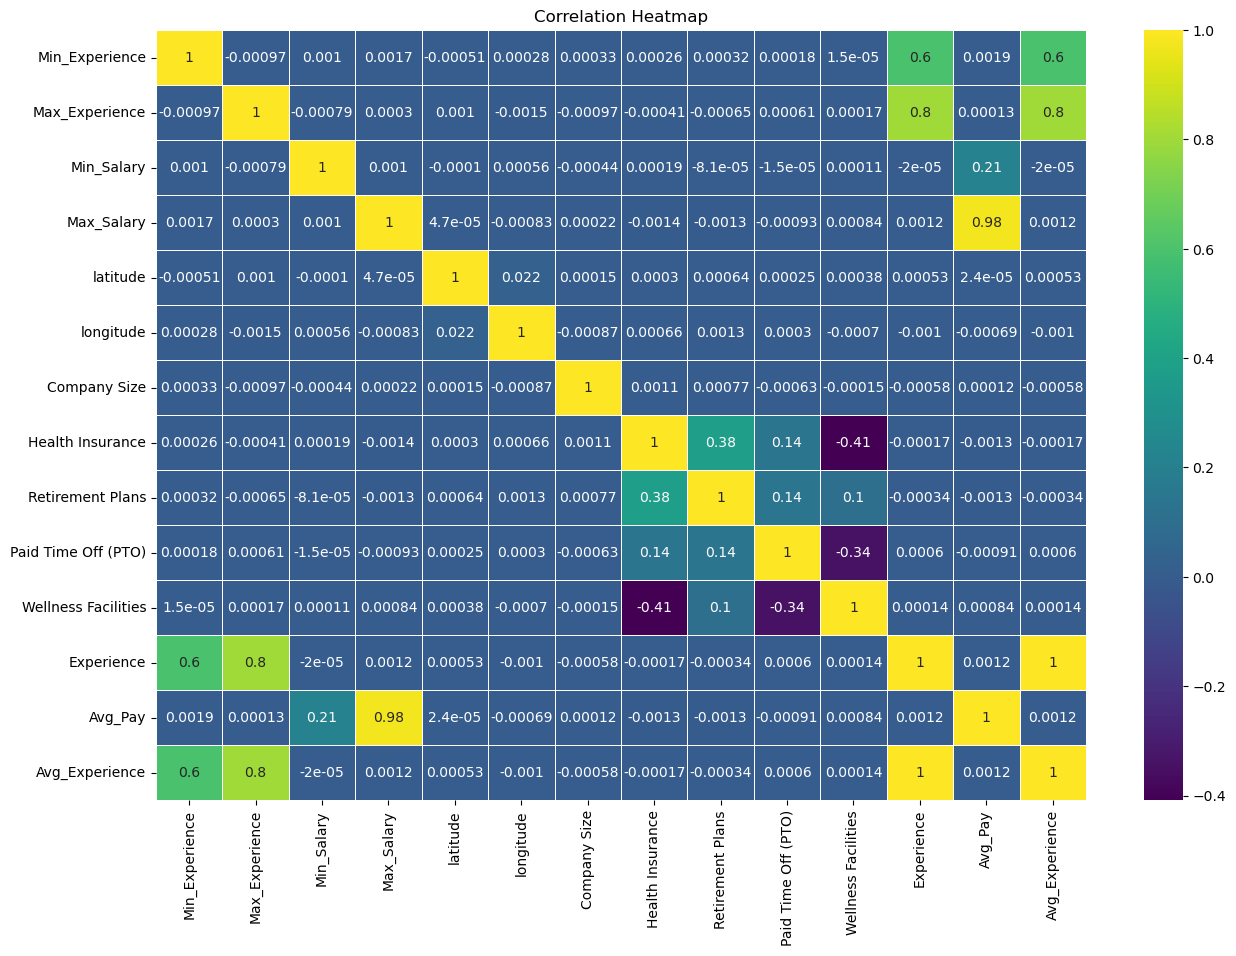

In [72]:
import seaborn as sns


# Calculating the correlation matrix
correlation_matrix = df.corr()

# Selecting the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Getting the top 100 correlations (excluding self-correlations)
top_correlations = upper_triangle.unstack().nlargest(20)

# Displaying every other correlation to avoid redundancy
top_correlations = top_correlations[::2]

# Printing the top correlations
print("Top Correlations:")
print(top_correlations)

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<font color='#377380'>The following are some of the insights that can be drawn from the correlation map:

<font color='#377380'>Experience is positively correlated with salary. This means that workers with more experience tend to earn more money. This is likely due to the fact that experienced workers are often more productive and knowledgeable than workers with less experience.
Company size is positively correlated with salary. This means that workers at larger companies tend to earn more money than workers at smaller companies. This is likely due to the fact that larger companies often have more resources to invest in their employees' salaries and benefits.
Health insurance, retirement plans, and paid time off are all positively correlated with salary. This means that workers who have access to these benefits tend to earn more money than workers who do not. This is likely due to the fact that these benefits are valuable to workers and employers are willing to pay more to attract and retain employees who have them.
Latitude and longitude are negatively correlated with salary. 
Overall, the correlation map provides insights into the relationships between various factors that can affect a worker's salary. This information can be useful for workers, employers, and policymakers to make better decisions about careers, compensation, and employment.

<font color='#377380'> **Result: We didn't have to drop any columns as there is no significant correlation between any of the columns which might cause the analysis to be biased**

## <font color='#4B4278'>Insights

### <font color='#43A677'> Insight 1: <u>Top Buzzwords and the top sectors that require those skills.</u>

In [45]:
import matplotlib.pyplot as plt
from collections import Counter

<Figure size 1200x800 with 0 Axes>

<BarContainer object of 16 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Python'),
  Text(1, 0, 'CSS'),
  Text(2, 0, 'AWS'),
  Text(3, 0, 'Java'),
  Text(4, 0, 'Tableau'),
  Text(5, 0, 'Facebook'),
  Text(6, 0, 'Twitter'),
  Text(7, 0, 'SQL'),
  Text(8, 0, 'HTML'),
  Text(9, 0, 'writing'),
  Text(10, 0, 'editing'),
  Text(11, 0, 'graphic design'),
  Text(12, 0, 'AutoCAD'),
  Text(13, 0, 'VMware'),
  Text(14, 0, 'SolidWorks'),
  Text(15, 0, 'SAP')])

Text(0.5, 1.0, 'Count of Buzzwords in Skills')

Text(0.5, 0, 'Buzzword')

Text(0, 0.5, 'Count')

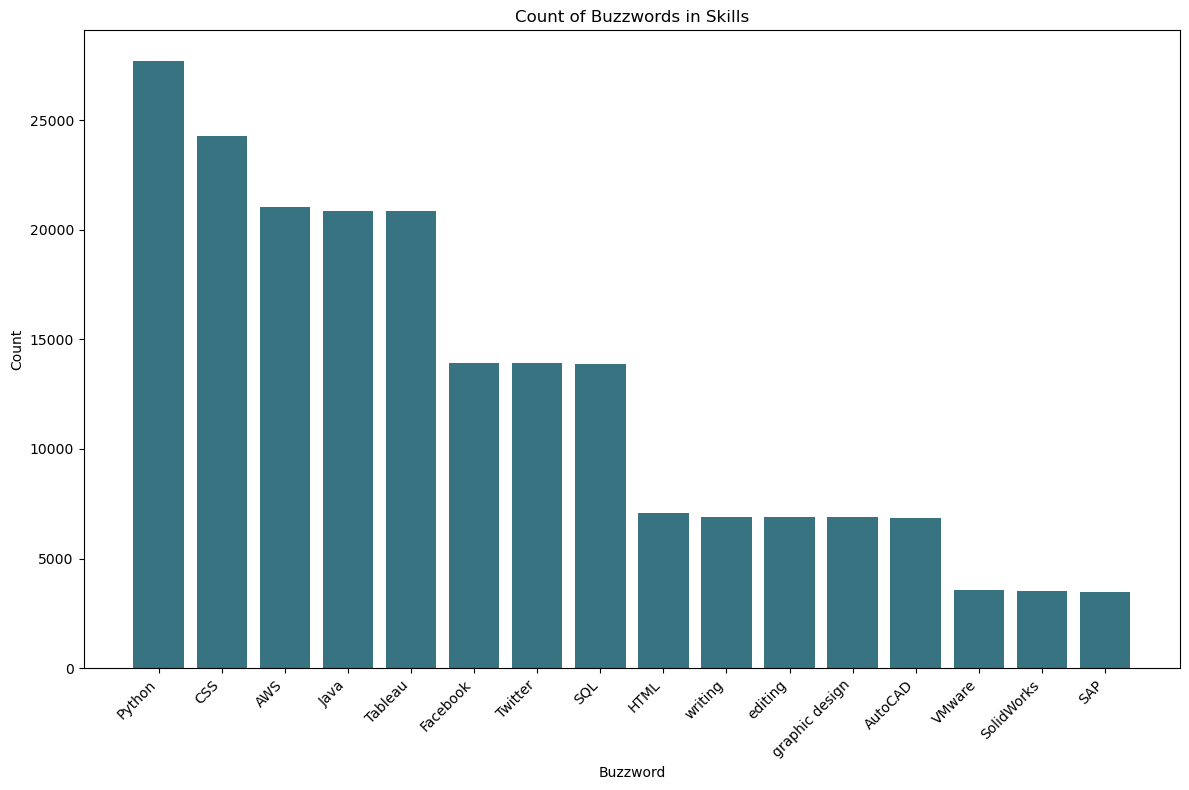

In [74]:
with open('skills_buzzwords.txt', 'r') as file:
    buzzwords = [line.strip() for line in file]

# Flattening the list of skills from the DataFrame
all_skills = [skill for skills_list in df['skills'].str.split(', ') for skill in skills_list if skill]

# Counting occurrences of each buzzword in the skills column
buzzword_counts = Counter([word for word in all_skills if word in buzzwords])

# Creating a DataFrame from the Counter
buzzword_df = pd.DataFrame(list(buzzword_counts.items()), columns=['Buzzword', 'Count'])

# Sorting the DataFrame by count in descending order
buzzword_df = buzzword_df.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(buzzword_df['Buzzword'], buzzword_df['Count'], color='#377380')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Count of Buzzwords in Skills')
plt.xlabel('Buzzword')
plt.ylabel('Count')
plt.tight_layout()

# Showing the plot
plt.show()

**<font color ='#377380'> <u>Insight</u>: The buzzwords with the highest frequency i.e the skills in demand in the industry**

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Sector', ylabel='Count'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Energy/Oil and Gas'),
  Text(1, 0, 'Industrial'),
  Text(2, 0, 'Tools & Equipment'),
  Text(3, 0, 'Food Services'),
  Text(4, 0, 'Technology and Engineering')])

Text(0.5, 1.0, 'Top 5 Buzzwords and Their Occurrences in Sectors')

Text(0.5, 0, 'Sector')

Text(0, 0.5, 'Count')

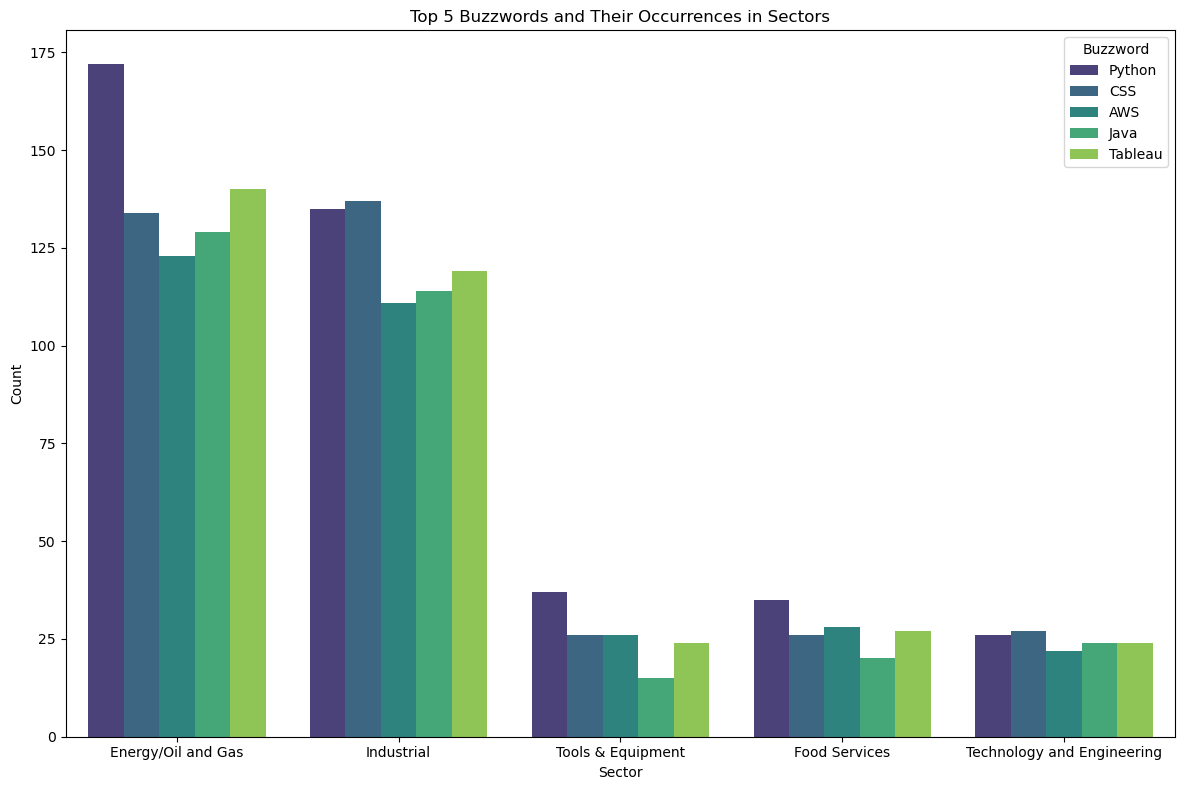

In [85]:
# Getting the top 5 buzzwords
top_buzzwords = buzzword_df.nlargest(5, 'Count')['Buzzword'].tolist()

# Creating a DataFrame for the selected buzzwords and their occurrences in sectors
buzzword_sector_counts = []

for buzzword in top_buzzwords:
    buzzword_counts_by_sector = Counter([sector for skills_list, sector in zip(df['skills'].str.split(', '), df['Sector']) if buzzword in skills_list])
    for sector, count in buzzword_counts_by_sector.items():
        buzzword_sector_counts.append({'Buzzword': buzzword, 'Sector': sector, 'Count': count})

buzzword_sector_df = pd.DataFrame(buzzword_sector_counts)

# Filtering for the first 5 sectors
top_5_sectors = buzzword_sector_df['Sector'].value_counts().nlargest(5).index
buzzword_sector_df_top5 = buzzword_sector_df[buzzword_sector_df['Sector'].isin(top_5_sectors)]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Sector', y='Count', hue='Buzzword', data=buzzword_sector_df_top5, palette='viridis')
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability
plt.title('Top 5 Buzzwords and Their Occurrences in Sectors')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.tight_layout()

# Showing the plot
plt.show()


**<font color = '#377380'><u>Insight</u>: Skills needed in a particular sector**

### <font color ='#8FC457'> <u> Managerial insights</u>
    
    
<font color = '#377380'>This insight will help applicants to know the skills that are most in demand in the industry and to understand which are the top skills required for each sector.

### <font color='#43A677'>Insight 2: <u>Location and Companies, Headquarters and their location</u>

In [48]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame

# Assuming 'df' is your DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Create a base map centered on a specific location
m = folium.Map(location=[df.latitude.mean(), df.longitude.mean()], zoom_start=2, control_scale=True, lang='en')

# Add a HeatMap layer to visualize company density
HeatMap(data=gdf[['latitude', 'longitude']].groupby(['latitude', 'longitude']).size().reset_index(name='count').values.tolist(),
        radius=15, blur=10, max_zoom=4).add_to(m)

# Save the map to an HTML file
m.save('company_map.html')

# Display the map using IFrame
IFrame(src='company_map.html', width=1000, height=600)

In [49]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Assuming 'df' is your DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Creating a base map centered on the world
m = folium.Map(location=[0, 0], zoom_start=2, control_scale=True, lang='en')

# Adding a HeatMap layer to visualize company density based on zip code
HeatMap(data=gdf[['latitude', 'longitude']].groupby(['latitude', 'longitude']).size().reset_index(name='count').values.tolist(),
        radius=15, blur=10, max_zoom=4).add_to(m)

# Saving the map to an HTML file or display it
m.save('world_company_map.html')

# Displaying the saved map
from IPython.display import IFrame
IFrame(src='world_company_map.html', width=1000, height=600)


### <font color ='#8FC457'> <u> Managerial insights</u>
    
    
<font color = '#377380'>This insight will help the applicants to know the distribution of the companies i.e where they are located.
We concluded that as both the graphs are similar, most of the jobs posted were from the headquarters itself which shows that the jobs in this dataset will be comparitively more stable hence would support a larger workforce and more number of openings would be available in the company.

### <font color='#43A677'>Insight 3: <u>Using ML techniques.</u>

#### <font color='#377380'>Decision Tree

In [50]:
pip install graphviz pydotplus

Note: you may need to restart the kernel to use updated packages.


In [51]:
df3= df.copy()

In [52]:
df3 = pd.get_dummies(df, columns=['Work Type', 'Qualifications', 'Preference'], dummy_na=True)

In [53]:
df3.head()

,Min_Experience,Max_Experience,Min_Salary,Max_Salary,location,Country,latitude,longitude,Company Size,Job Posting Date,Contact Person,Contact,Cleaned_Contact,Job Title,Role,Job Portal,Job Description,Benefits,Health Insurance,Retirement Plans,Paid Time Off (PTO),Wellness Facilities,skills,Responsibilities,Company,Experience,Sector,Industry,City,State,Zip,Website,Ticker,CEO,Work Type_Contract,Work Type_Full-Time,Work Type_Intern,Work Type_Part-Time,Work Type_Temporary,Work Type_nan,Qualifications_B.Com,Qualifications_B.Tech,Qualifications_BA,Qualifications_BBA,Qualifications_BCA,Qualifications_M.Com,Qualifications_M.Tech,Qualifications_MBA,Qualifications_MCA,Qualifications_PhD,Qualifications_nan,Preference_Both,Preference_Female,Preference_Male,Preference_nan
Job Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1089843540111562,5,15,59,99,Douglas,Isle of Man,54.2361,-4.5481,26801,2022-04-24,Brandon Cunningham,001-381-930-7517x737,+1-381-930-7517,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...",0,0,0,0,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,10.0,Diversified,Diversified Financials,Sunny Isles Beach,Florida,33160,www.ielp.com,IEP,David Willetts,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
398454096642776,2,12,56,116,Ashgabat,Turkmenistan,38.9697,59.5563,100340,2022-12-19,Francisco Larsen,461-509-4216,+1-461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...",1,1,1,0,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,7.0,Financial Services,Commercial Banks,Pittsburgh,Pennsylvania,15222,www.pnc.com,PNC,William S. Demchak,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
481640072963533,0,12,61,104,Macao,"Macao SAR, China",22.1987,113.5439,84525,2022-09-14,Gary Gibson,9687619505,+1-968-761-9505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",0,1,0,1,Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,6.0,Insurance,Insurance: Property and Casualty (Stock),San Antonio,Texas,78288,www.usaa.com,,Wayne Peacock,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
688192671473044,4,11,65,91,Porto-Novo,Benin,9.3077,2.3158,129896,2023-02-25,Joy Lucero,+1-820-643-5431x47576,+1-182-064-3543,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",0,0,0,0,Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,7.5,Energy,"Mining, Crude-Oil Production",New York,New York,10036,www.hess.com,HES,John B. Hess,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
117057806156508,1,12,64,87,Santiago,Chile,-35.6751,-71.5429,53944,2022-10-11,Julie Johnson,343.975.4702x9340,+1-343-975-4702,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",0,0,0,0,Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,6.5,Energy,Energy - Oil & Gas Exploration & Production,Edinburgh,Scotland,EH2 4NH,https://www.cairnenergy.com/,CNE,Simon Thomson,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [54]:
columns_to_drop = [
    'Min_Experience', 'Max_Experience', 'Min_Salary', 'Max_Salary', 'location', 
    'Country', 'latitude', 'longitude', 'Contact Person', 'Contact', 'Job Title', 'Role', 'Job Portal', 
    'Job Description', 'Benefits', 'Health Insurance', 'Retirement Plans', 
    'Paid Time Off (PTO)', 'Wellness Facilities', 'skills', 'Responsibilities', 
    'Company', 'Sector', 'Industry', 'City', 'State', 'Zip', 'CEO', 'Cleaned_Contact', 'Website', 'Ticker', 'Job Posting Date'
]

df3.drop(columns=columns_to_drop, inplace=True)


In [55]:
# Calculating average pay
df['Avg_Pay'] = (df['Min_Salary'] + df['Max_Salary']) / 2

In [56]:
df3['Avg_Pay'] = df.Avg_Pay.apply(lambda x: 1.0 if x > 75 else 0.0)

In [57]:
# Checking the output using head()

df3.head()

,Company Size,Experience,Work Type_Contract,Work Type_Full-Time,Work Type_Intern,Work Type_Part-Time,Work Type_Temporary,Work Type_nan,Qualifications_B.Com,Qualifications_B.Tech,Qualifications_BA,Qualifications_BBA,Qualifications_BCA,Qualifications_M.Com,Qualifications_M.Tech,Qualifications_MBA,Qualifications_MCA,Qualifications_PhD,Qualifications_nan,Preference_Both,Preference_Female,Preference_Male,Preference_nan,Avg_Pay
Job Id,,,,,,,,,,,,,,,,,,,,,,,,
1089843540111562,26801,10.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1.0
398454096642776,100340,7.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.0
481640072963533,84525,6.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1.0
688192671473044,129896,7.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1.0
117057806156508,53944,6.5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1.0


In [58]:

X = df3.drop(columns=['Avg_Pay'])

In [59]:

Y = df3.Avg_Pay

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'Company Size <= 12646.5\ngini = 0.339\nsamples = 1615940\nvalue = [348942, 1266998]\nclass = High Paying Jobs'),
 Text(0.25, 0.5, 'Qualifications_BBA <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [6, 5]\nclass = Low Paying Jobs'),
 Text(0.125, 0.16666666666666666, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]\nclass = Low Paying Jobs'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = High Paying Jobs'),
 Text(0.75, 0.5, 'Experience <= 9.25\ngini = 0.339\nsamples = 1615929\nvalue = [348936, 1266993]\nclass = High Paying Jobs'),
 Text(0.625, 0.16666666666666666, 'gini = 0.339\nsamples = 1515091\nvalue = [327455, 1187636]\nclass = High Paying Jobs'),
 Text(0.875, 0.16666666666666666, 'gini = 0.335\nsamples = 100838\nvalue = [21481, 79357]\nclass = High Paying Jobs')]

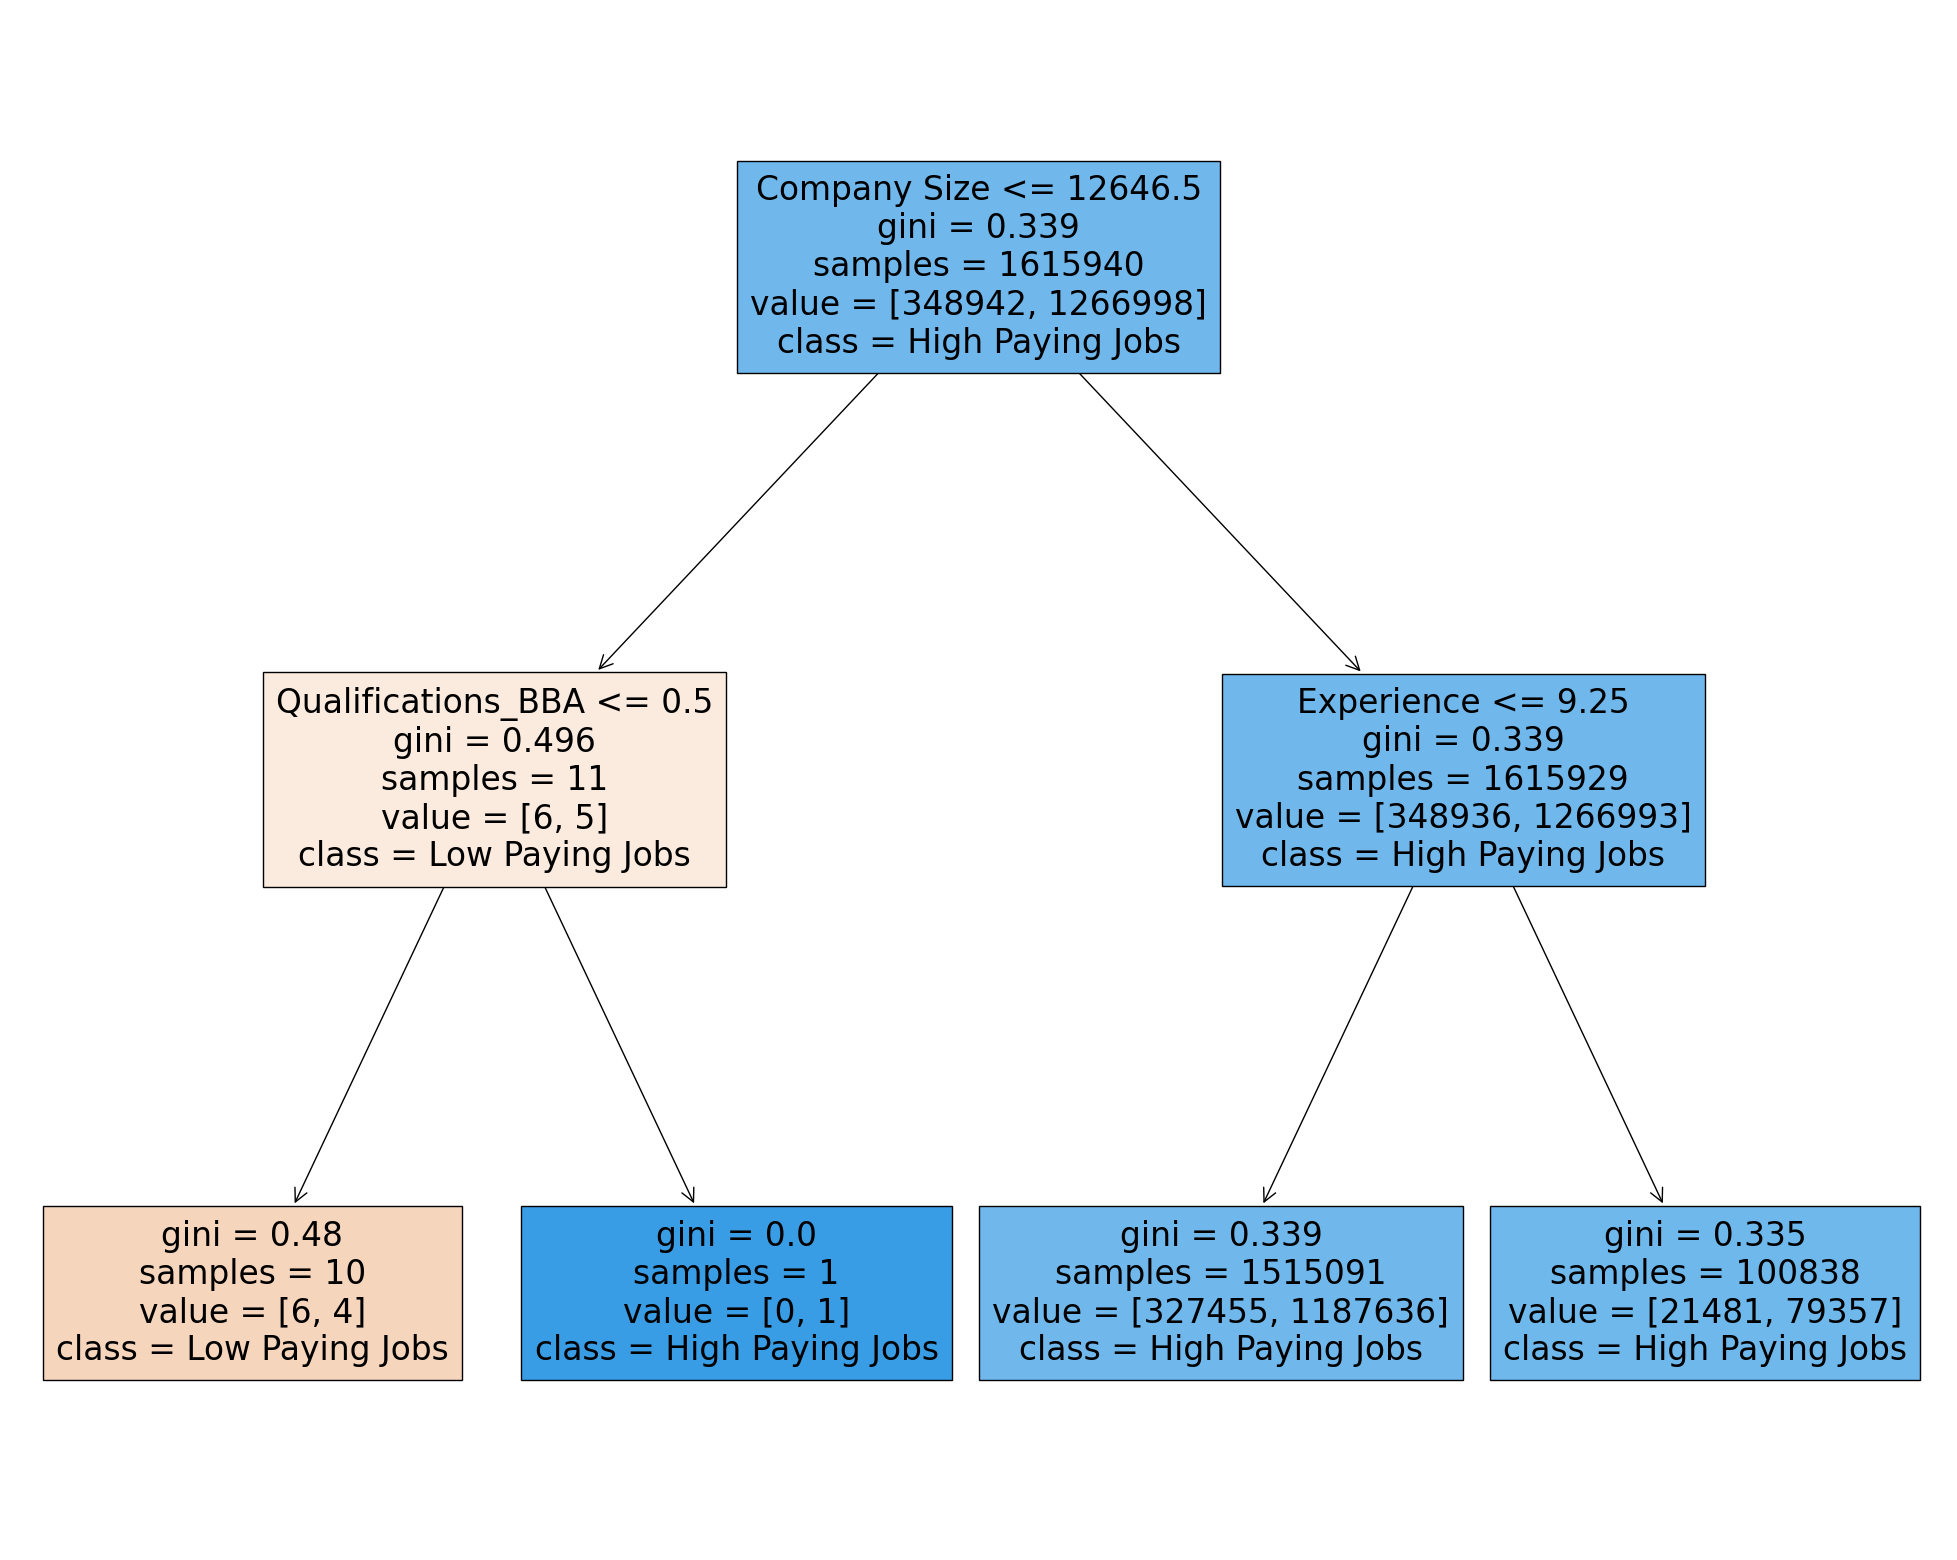

In [80]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Assuming 'X' and 'Y' are defined
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X, Y)

dt_feature_names = list(X.columns)
dt_target_names = ['Low Paying Jobs', 'High Paying Jobs']
fig = plt.figure(figsize=(25,20))
plot_tree(dt,
          feature_names=dt_feature_names,
          class_names=dt_target_names,
          filled=True)
plt.show()


### <font color ='#8FC457'> <u> Managerial insights</u>
    
    
<font color = '#377380'>This insight will help the applicants to know what factors affect the average pay hence, what to focus upon to get high paying jobs

<font color = '#377380'>As we can see, above a particular value of company size, all jobs are high paying. So, company size is the main factor of determining if a jobb is high paying or not.

<font color = '#377380'>Next, qualifications below BA aren’t high paying but the BA qualifications are high paying.

<font color = '#377380'>Experience could also play a factor but as the company size is large, the job will be high paying no matter what

In [61]:
qualifications_avg_pay = df.groupby('Qualifications')['Avg_Pay'].mean().sort_values()

In [62]:
qualifications_avg_pay

Qualifications
BCA       82.462463
B.Com     82.471856
M.Com     82.473866
B.Tech    82.485230
BBA       82.489349
PhD       82.496759
MBA       82.500885
M.Tech    82.504897
MCA       82.505508
BA        82.520658
Name: Avg_Pay, dtype: float64

<Axes: xlabel='Qualifications', ylabel='Avg_Pay'>

Text(0.5, 0, 'Qualifications')

Text(0, 0.5, 'Value')

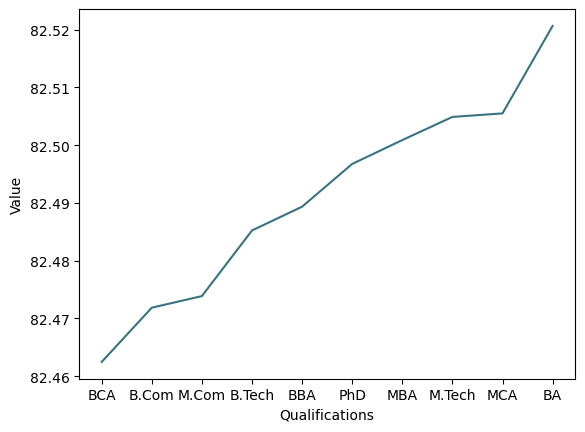

In [81]:
sns.lineplot( data=qualifications_avg_pay, color='#377380')

plt.xlabel('Qualifications')
plt.ylabel('Value')
plt.show()

<font color ='#377380'> The line graph shows the average annual salary for different qualifications. The qualifications are BCA, B.Com, M.Com, B.Tech, BBA, PhD, MBA, M.Tech, MCA, and BA.

<font color ='#377380'> The graph shows that the average annual salary for a qualification is generally higher the higher the qualification level. This is because higher qualifications typically require more education and training, and workers with higher qualifications are often in higher demand.

<font color ='#377380'> However, there are some exceptions to this trend. For example, the average annual salary for a B.Tech is slightly higher than the average annual salary for a PhD. This is likely because B.Tech graduates are in high demand in certain industries, such as technology.

<font color ='#377380'> The graph also shows that there is a significant variation in average annual salary between different qualifications. For example, the average annual salary for a B.Tech is over $2,000 higher than the average annual salary for a BCA.

## <font color='#4B4278'>Extra Insights

### <font color ='#43A677'> Job Postings vs Date of posting

In [64]:
import seaborn as sns

<Figure size 1200x600 with 0 Axes>

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Job Postings by Day of the Week')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Number of Postings')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Job Postings by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Postings')

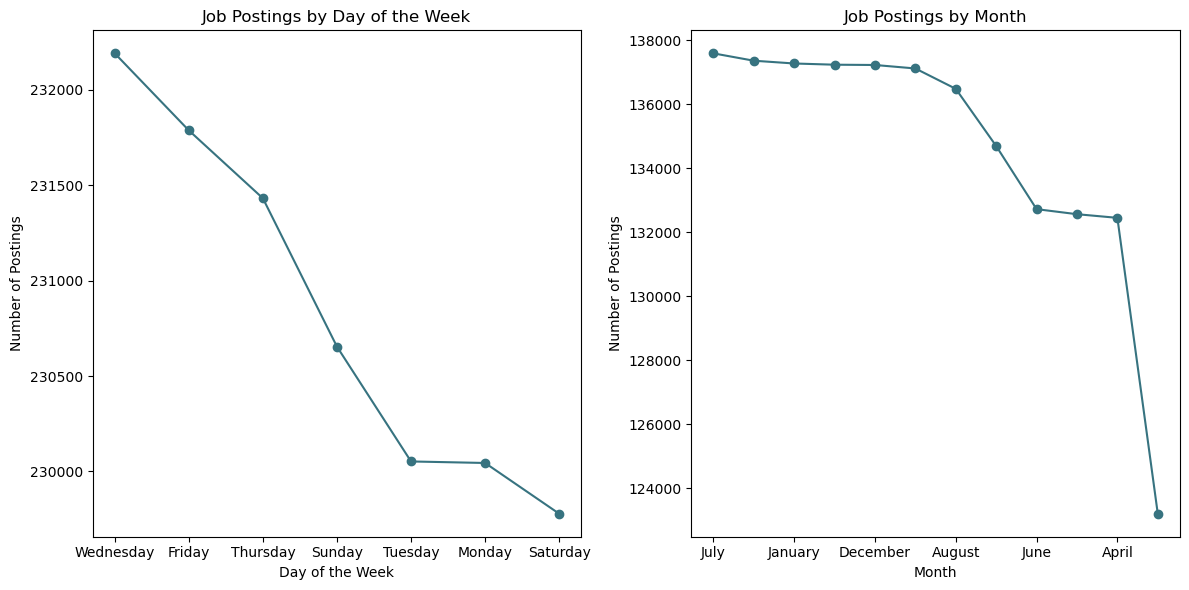

In [82]:
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'])

# Extracting day of the week and month from the date
df['Day_of_Week'] = df['Job Posting Date'].dt.day_name()
df['Month'] = df['Job Posting Date'].dt.month_name()

# Group by day of the week and count the number of postings
day_of_week_counts = df['Day_of_Week'].value_counts()

# Group by month and count the number of postings
month_counts = df['Month'].value_counts()

# Plotting

# Line chart for day of the week
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
day_of_week_counts.plot(kind='line', marker='o', color = '#377380')
plt.title('Job Postings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Postings')

# Line chart for month
plt.subplot(1, 2, 2)
month_counts.plot(kind='line', marker='o', color ='#377380')
plt.title('Job Postings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Postings')

plt.tight_layout()
plt.show()

<font color =#377380>**Analysis by day of the week**

<font color =#377380>The graph shows that the average number of job postings is highest on Wednesday and Thursday. This suggests that employers are more likely to post new job openings on these days of the week.

<font color =#377380>**Analysis by month**

<font color =#377380>The graph shows that the average number of job postings is highest in July and January. This suggests that employers are more likely to be hiring new employees during these months.

<font color =#377380>The graph provides insights into the timing of job postings. Job seekers should be aware that employers are more likely to post new job openings on Wednesdays and Thursdays, and in July and January. This information can be used by job seekers to plan their job search and increase their chances of success.

### <font color ='#43A677'>Avg pay vs experience

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Relation between Average Pay and Average Experience')

Text(0.5, 0, 'Average Experience (Years)')

Text(0, 0.5, 'Average Pay')

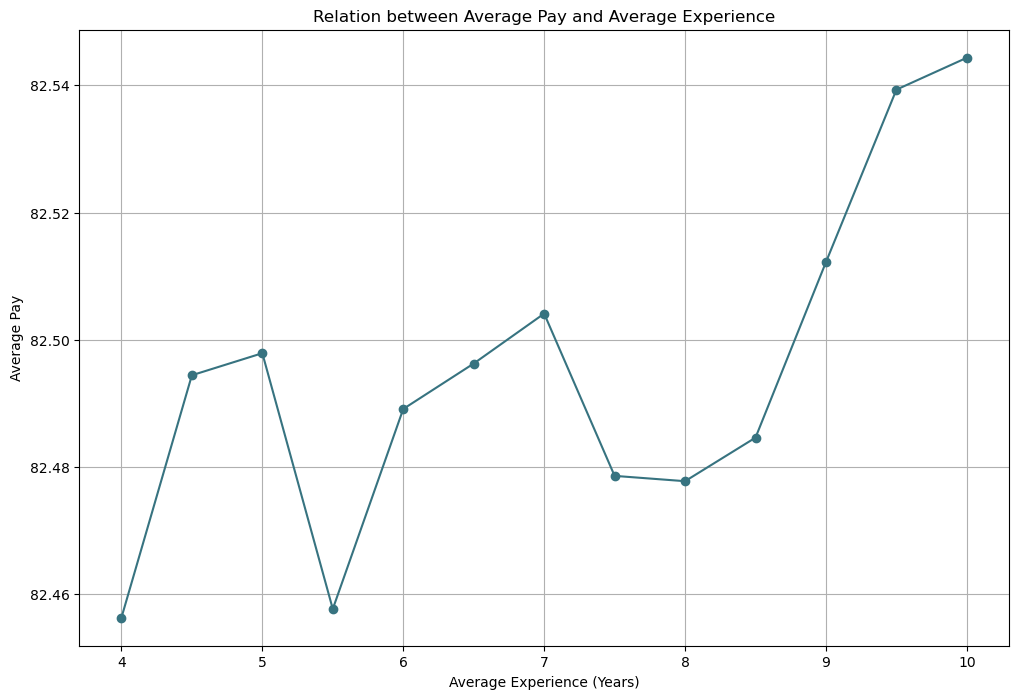

In [83]:
# Converting salary columns to numeric
df['Min_Salary'] = pd.to_numeric(df['Min_Salary'], errors='coerce')
df['Max_Salary'] = pd.to_numeric(df['Max_Salary'], errors='coerce')

# Calculating average experience and avg pay
df['Avg_Experience'] = (df['Min_Experience'] + df['Max_Experience']) / 2

df['Avg_Pay'] = (df['Min_Salary'] + df['Max_Salary']) / 2

# Group by average experience and calculate mean pay for each group
avg_pay_by_experience = df.groupby('Avg_Experience')['Avg_Pay'].mean().reset_index()

# Plot lining
plt.figure(figsize=(12, 8))
plt.plot(avg_pay_by_experience['Avg_Experience'], avg_pay_by_experience['Avg_Pay'], marker='o', linestyle='-', color='#377380')

# Labels 
plt.title('Relation between Average Pay and Average Experience')
plt.xlabel('Average Experience (Years)')
plt.ylabel('Average Pay')

# Displaying the plot.
plt.grid(True)
plt.show()

<font color = '#377380'> The anlysis says that average pay increases with average experience suggests that education and training are important for career success.
The fact that the rate at which average pay increases with average experience slows down at higher levels of experience suggests that it is important to develop new skills and knowledge throughout one's career.
The fact that workers at higher levels are often rewarded with other benefits suggests that non-monetary compensation is also important to consider when making career decisions.